# E3SM AMOC visualization development for ImPACTS

***

In [1]:
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
gridpath = '/global/cfs/cdirs/e3sm/inputdata/ocn/mpas-o/EC30to60E2r2/'
resultspath = '/global/cfs/cdirs/m4259/E3SMv2_1/20220715.submeso.piControl.ne30pg2_EC30to60E2r2.chrysalis/ocn/hist/'
gridfile = 'ocean.EC30to60E2r2.200908.nc'
resultsprefix = '20220715.submeso.piControl.ne30pg2_EC30to60E2r2.chrysalis.mpaso.hist.am.timeSeriesStatsMonthly'

In [4]:
ds_grid = xr.open_dataset(gridpath + gridfile)
depth = ds_grid.refBottomDepth.values

***

### submeso.piControl.ne30pg2_EC30to60E2r2
```/global/cfs/cdirs/m4259/E3SMv2_1/20220715.submeso.piControl.ne30pg2_EC30to60E2r2.chrysalis/ocn/hist```

**Combined regions - full**

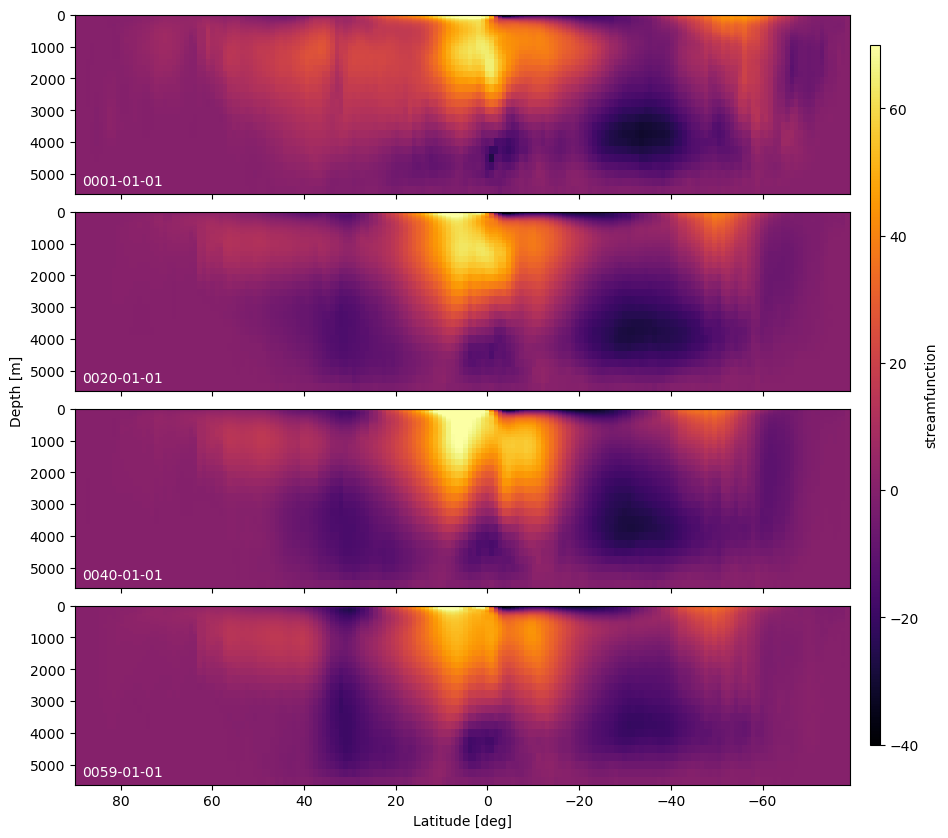

In [34]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10), gridspec_kw={'hspace': 0.1})

for year, ax in zip([1, 20, 40, 59], axs):
    date = datetime(year, 1, 1)
    datestr = date.strftime('00%y-%m-%d')
    ds_results = xr.open_dataset(resultspath + resultsprefix + f'.{datestr}.nc')
    lat = np.rad2deg(ds_results.binBoundaryMocStreamfunction.values)
    streamfunction = ds_results.timeMonthly_avg_mocStreamvalLatAndDepth[0, ...].values
    c = ax.pcolormesh(lat, depth, streamfunction, cmap='inferno', vmin=-40, vmax=70)
    ax.set_xlim(90, -79)
    ax.set_ylim(5625, 0)
    ax.text(0.01, 0.05, datestr, transform=ax.transAxes, c='w')
    if year < 50:
        ax.xaxis.set_ticklabels('')

axs[3].set_xlabel('Latitude [deg]')
axs[2].set_ylabel('Depth [m]', y=1.1)
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(c, cax=cax, label='streamfunction')

**Combined regions - GM**

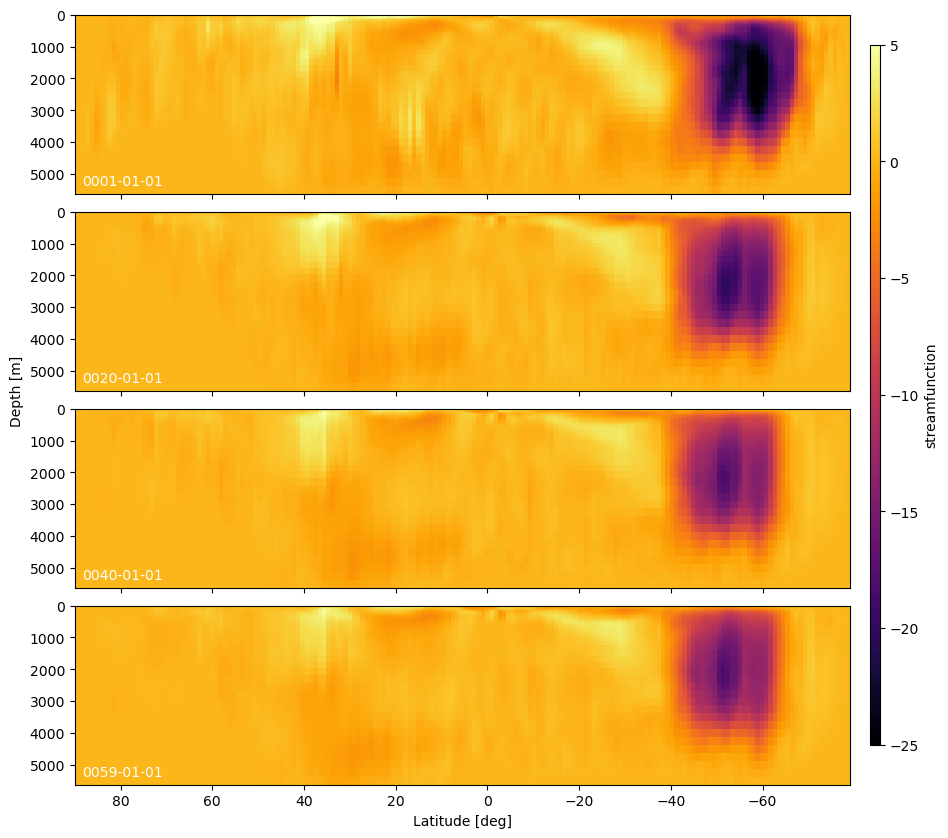

In [82]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10), gridspec_kw={'hspace': 0.1})

for year, ax in zip([1, 20, 40, 59], axs):
    date = datetime(year, 1, 1)
    datestr = date.strftime('00%y-%m-%d')
    ds_results = xr.open_dataset(resultspath + resultsprefix + f'.{datestr}.nc')
    lat = np.rad2deg(ds_results.binBoundaryMocStreamfunction.values)
    streamfunction = ds_results.timeMonthly_avg_mocStreamvalLatAndDepthGM[0, ...].values
    c = ax.pcolormesh(lat, depth, streamfunction, cmap='inferno', vmin=-25, vmax=5)
    ax.set_xlim(90, -79)
    ax.set_ylim(5625, 0)
    ax.text(0.01, 0.05, datestr, transform=ax.transAxes, c='w')
    if year < 50:
        ax.xaxis.set_ticklabels('')

axs[3].set_xlabel('Latitude [deg]')
axs[2].set_ylabel('Depth [m]', y=1.1)
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(c, cax=cax, label='streamfunction')

**By region - full**

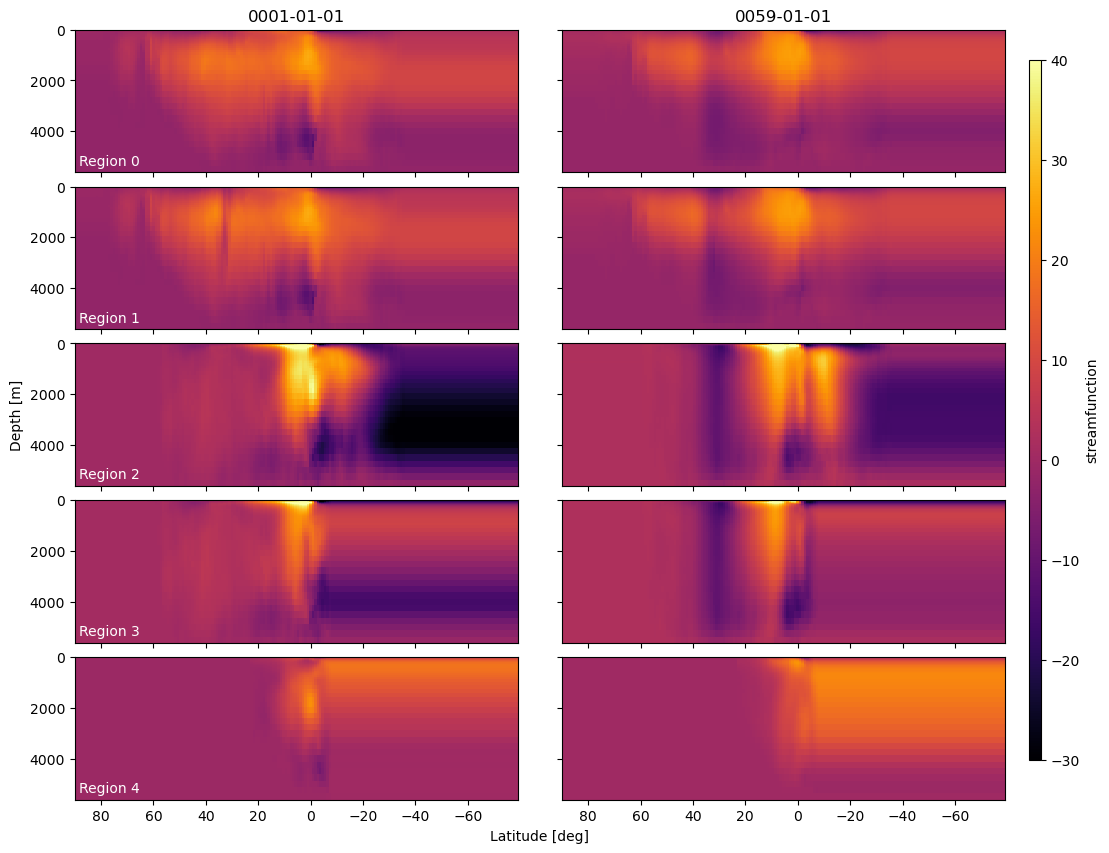

In [71]:
fig, axs = plt.subplots(5, 2, figsize=(12, 10), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

for year, col in zip([1, 59], axs.T):
    date = datetime(year, 1, 1)
    datestr = date.strftime('00%y-%m-%d')
    ds_results = xr.open_dataset(resultspath + resultsprefix + f'.{datestr}.nc')
    lat = np.rad2deg(ds_results.binBoundaryMocStreamfunction.values)
    for region, ax in zip(range(5), col):
        streamfunction = ds_results.timeMonthly_avg_mocStreamvalLatAndDepthRegion[0, region, ...].values
        c = ax.pcolormesh(lat, depth, streamfunction, cmap='inferno', vmin=-30, vmax=40)
        ax.set_xlim(90, -79)
        ax.set_ylim(5625, 0)
        if region == 0:
            ax.set_title(datestr)
        if region < 4:
            ax.xaxis.set_ticklabels('')
        if year == 1:
            ax.text(0.01, 0.05, f'Region {region}', transform=ax.transAxes, c='w')
        else:
            ax.yaxis.set_ticklabels('')

axs[4, 0].set_xlabel('Latitude [deg]', x=1.05)
axs[2, 0].set_ylabel('Depth [m]')
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(c, cax=cax, label='streamfunction')

**By region - GM**

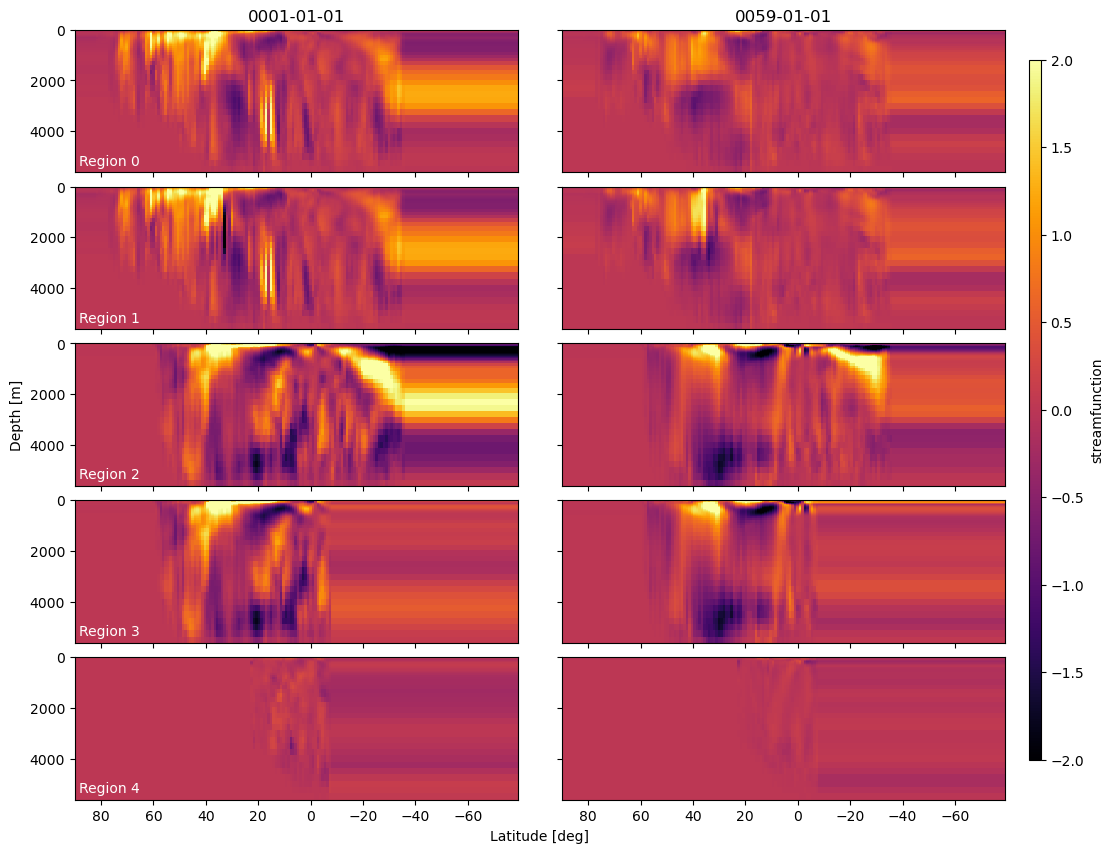

In [88]:
fig, axs = plt.subplots(5, 2, figsize=(12, 10), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

for year, col in zip([1, 59], axs.T):
    date = datetime(year, 1, 1)
    datestr = date.strftime('00%y-%m-%d')
    ds_results = xr.open_dataset(resultspath + resultsprefix + f'.{datestr}.nc')
    lat = np.rad2deg(ds_results.binBoundaryMocStreamfunction.values)
    for region, ax in zip(range(5), col):
        streamfunction = ds_results.timeMonthly_avg_mocStreamvalLatAndDepthRegionGM[0, region, ...].values
        c = ax.pcolormesh(lat, depth, streamfunction, cmap='inferno', vmin=-2, vmax=2)
        ax.set_xlim(90, -79)
        ax.set_ylim(5625, 0)
        if region == 0:
            ax.set_title(datestr)
        if region < 4:
            ax.xaxis.set_ticklabels('')
        if year == 1:
            ax.text(0.01, 0.05, f'Region {region}', transform=ax.transAxes, c='w')
        else:
            ax.yaxis.set_ticklabels('')

axs[4, 0].set_xlabel('Latitude [deg]', x=1.05)
axs[2, 0].set_ylabel('Depth [m]')
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(c, cax=cax, label='streamfunction')